# 線形基底関数モデル  
参考にしたやつ  
https://www.amazon.co.jp/Python%E3%81%A7%E5%8B%95%E3%81%8B%E3%81%97%E3%81%A6%E5%AD%A6%E3%81%B6%EF%BC%81-%E3%81%82%E3%81%9F%E3%82%89%E3%81%97%E3%81%84%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%81%AE%E6%95%99%E7%A7%91%E6%9B%B8-%E4%BC%8A%E8%97%A4-%E7%9C%9F/dp/4798144983  
  
曲線の方がしっくりくる  
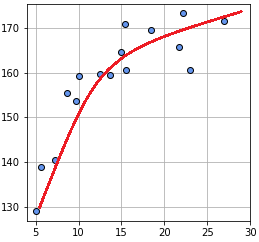

In [58]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# データロード
outfile = np.load('ch5_data.npz')
X = outfile['x']
X_min = 0
X_max = outfile['x_max']
X_n = outfile['x_n']
T = outfile['t']


## ガウス関数  
中心位置が最大値、そこからy軸に対して左右対称に広がる曲線。正規分布。自然界で起こるあらゆる現象は、このような曲線で表されると言われている。  
φ: ファイ   
μ: ミュー　中心位置   
s : 関数の広がりの程度   
$$
φ_j(x) = exp \biggr\{ -\frac{(x-μ_j)^2}{2s^2} \biggr\}
$$

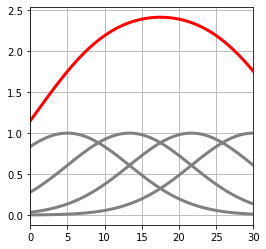

In [174]:
# ガウス関数
def gauss(x, mu, s):
    return np.exp(-(x - mu)**2 / (2 * s**2))

# 4つのガウス関数を 年齢５～３０で等間隔に配置してplot
M = 4
plt.figure(figsize=(4,4))
mu = np.linspace(5, 30, M) # 4等分に分割
s = mu[1] - mu[0]          # 分割した間隔
y_sum = 0
xb = np.linspace(X_min, X_max, 100)
for j in range(M):
    emu = 1
    #emu = np.random.randint(-5, 5)
    y = emu * gauss(xb, mu[j], s)
    y_sum += y 
    plt.plot(xb, y, color='gray', linewidth=3)
plt.grid(True)

plt.plot(xb, y_sum, c='red', linewidth=3)

plt.xlim(X_min, X_max)
#plt.ylim(0, 1.2)
plt.show()

複数のガウス曲線を等間隔に並べることで、

## M = 4 のときの線形基底関数モデル  
基底関数に重みを付けて足し合わせたもの  
w・・・重みパラメータ
$$
    y = w_0 φ_0(x) + w_1 φ_1(x) + w_2 φ_2(x) + w_3 φ_3(x) + w_4
$$


In [61]:
# 線形基底関数モデル
def gauss_func(w, x):
    m = len(w) -1
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    y = np.zeros_like(x)
    for j in range(m):
        y = y + w[j] * gauss(x, mu[j], s)
    y = y + w[m]
    
    return y

# 線形基底関数モデルMSE
def mse_gauss_func(x, t, w):
    y = gauss_func(w, x)
    print("y:",y)
    mse = np.mean((y - t)**2)
    return mse

In [168]:
m = [1, 1, 1, 1, 1]
gauss_func(m, X)


array([3.39830964, 3.29694111, 2.75328733, 3.3206183 , 3.09670858,
       2.98356255, 3.16747773, 3.35792797, 3.38945054, 3.41082054,
       3.3991418 , 3.33240362, 3.1968272 , 3.04721647, 2.82601565,
       3.34527159])

In [55]:
# 線形基底関数モデル　厳密解
def fit_gauss_func(x, t, m):
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    n = x.shape[0]
    #print("n:",n)
    phi = np.ones((n, m+1))
    #print("phi:",phi)

    for j in range(m):
        phi[:,j] = gauss(x, mu[j], s)
    #print("phi:",phi)
    phi_T = np.transpose(phi)
    #print("phi_T:",phi_T.shape)
    b = np.linalg.inv(phi_T.dot(phi))
    #print("b:",b.shape)
    c = b.dot(phi_T)
    #print("c:",c.shape)
    #print("t:",t.shape)
    w = c.dot(t)
    
    return w

y: [165.08738535 168.23476048 131.65465191 162.26291853 150.8042799
 144.48200674 154.66977358 163.76492662 164.82944353 165.80534831
 165.11075791 167.55387039 156.23115337 169.95913009 135.66848289
 167.28643958]
W= [29.38615946 75.66114072  2.86269022 98.27746408 54.88136904]
SD= 15.826627781131158


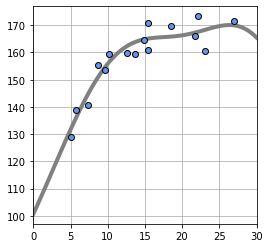

In [62]:
# ガウス基底関数表示
def show_gauss_func(w):
    xb = np.linspace(X_min, X_max, 100)
    y = gauss_func(w, xb)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4)

plt.figure(figsize=(4,4))
M = 4
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T,  marker='o', linestyle='None', c='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)

mse = mse_gauss_func(X, T, W)
print("W=", W)
print("SD=", mse)
plt.show()

In [48]:
X_max


array(30)